In [2]:
import sys
sys.path.append('../')
from utils.lib import *

Using TensorFlow backend.


In [3]:
data, label_file = load_data('',['../src/Method 2_dataset/thumbnail/'])
data = np.expand_dims(data,axis=0)

data.shape

data = data.reshape(5099,30,375,1)

data = data/255.

In [4]:
def reduce_line(img):
    kernel = np.ones((3,3), np.uint8)
    return cv2.dilate(img, kernel, iterations=1)

def noise(img):
    return skimage.util.random_noise(img, mode='gaussian', clip=True)

def blur(img):
    return cv2.blur(img,(8,8))


def expand_width(img):
    pxmin = np.min(img)
    pxmax = np.max(img)
    imgContrast = (img - pxmin) / (pxmax - pxmin) * 255

    kernel = np.ones((3, 3), np.uint8)
    imgMorph = cv2.erode(imgContrast, kernel, iterations = 1)
    return imgMorph

def augmentation(img):
    augmented = list()
    for i in img:
        augmented.append(i.reshape(30,375,1))
        #augmented.append(np.asarray(reduce_line(i)).reshape(30,375,1))
        augmented.append(np.asarray(noise(i)*255).reshape(30,375,1)/255)
        #augmented.append(np.asarray(blur(i)).reshape(30,375,1))
        augmented.append(np.asarray(expand_width(i)).reshape(30,375,1)/255)
        
    return np.asarray(augmented)

In [5]:
augmented = augmentation(data)

In [6]:
len(augmented)

15297

In [7]:
augmented.shape

(15297, 30, 375, 1)

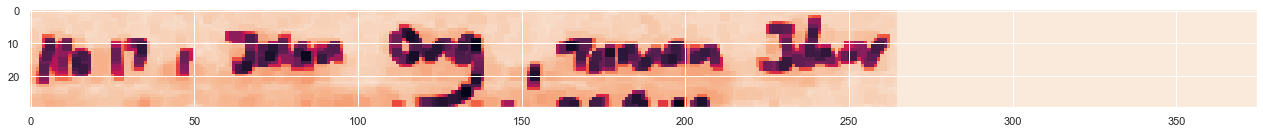

In [8]:
plt.imshow(augmented[2])

In [11]:
def save_augmented(imgs):
    for i in range(len(imgs)):
        width = 375
        height = 30
        width = int(width)
        height = int(height)

        img = imgs[i].reshape(30,375)
        image = Image.fromarray((img*255).astype(np.uint8))
        image = image.convert('RGB')
        image_resized = image.resize((width,height))
        image_resized.save('../src/Method 2_dataset/thumbnail_augment/'+str(i)+'.jpg','PNG', quality=100)

In [12]:
save_augmented(augmented)

In [1]:
f = open('../src/Method 2_dataset/final_handwritten.txt',"r")


full_label = list()

for line in f:


    full_label.append(line)
    


In [2]:
with open('../src/Method 2_dataset/final_augment_handwritten.txt', 'w') as file:
    for item in full_label:
        for i in range(3):
            file.writelines("%s"% (item))

In [10]:
%load_ext tensorboard




The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [11]:
%tensorboard --logdir logs